## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,742,058
Trainable params: 1,742,058
Non-trainable params: 0
___________________

50000/50000 [==============================] - 10s 190us/step - loss: 2.3041 - accuracy: 0.1000 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.3041 - accuracy: 0.0983 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.3041 - accuracy: 0.0989 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.3043 - accuracy: 0.0985 - val_loss: 2.3045 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________________________

Epoch 44/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.5270 - accuracy: 0.8077 - val_loss: 1.8965 - val_accuracy: 0.5285
Epoch 45/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.5047 - accuracy: 0.8180 - val_loss: 1.9709 - val_accuracy: 0.5175
Epoch 46/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.4872 - accuracy: 0.8239 - val_loss: 2.1671 - val_accuracy: 0.5034
Epoch 47/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.4911 - accuracy: 0.8236 - val_loss: 2.0332 - val_accuracy: 0.5136
Epoch 48/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.4638 - accuracy: 0.8332 - val_loss: 2.1312 - val_accuracy: 0.5186
Epoch 49/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.4524 - accuracy: 0.8356 - val_loss: 2.2437 - val_accuracy: 0.5218
Epoch 50/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.4482 - accuracy: 0.8390

Epoch 41/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.9176 - accuracy: 0.6744 - val_loss: 1.3759 - val_accuracy: 0.5364
Epoch 42/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.9054 - accuracy: 0.6801 - val_loss: 1.4805 - val_accuracy: 0.5096
Epoch 43/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.8944 - accuracy: 0.6815 - val_loss: 1.4798 - val_accuracy: 0.5092
Epoch 44/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.8843 - accuracy: 0.6850 - val_loss: 1.5122 - val_accuracy: 0.5133
Epoch 45/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.8668 - accuracy: 0.6938 - val_loss: 1.4652 - val_accuracy: 0.5149
Epoch 46/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.8532 - accuracy: 0.6959 - val_loss: 1.4219 - val_accuracy: 0.5275
Epoch 47/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.8336 - accuracy: 0.7049

Epoch 38/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.6041 - accuracy: 0.4377 - val_loss: 1.6094 - val_accuracy: 0.4324
Epoch 39/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.5980 - accuracy: 0.4394 - val_loss: 1.6056 - val_accuracy: 0.4293
Epoch 40/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.5924 - accuracy: 0.4413 - val_loss: 1.5994 - val_accuracy: 0.4357
Epoch 41/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.5868 - accuracy: 0.4432 - val_loss: 1.5954 - val_accuracy: 0.4350
Epoch 42/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.5808 - accuracy: 0.4458 - val_loss: 1.5941 - val_accuracy: 0.4364
Epoch 43/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.5749 - accuracy: 0.4470 - val_loss: 1.5852 - val_accuracy: 0.4400
Epoch 44/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5701 - accuracy: 0.44

Epoch 35/50
50000/50000 [==============================] - 9s 174us/step - loss: 2.0609 - accuracy: 0.2783 - val_loss: 2.0626 - val_accuracy: 0.2802
Epoch 36/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.0547 - accuracy: 0.2805 - val_loss: 2.0566 - val_accuracy: 0.2836
Epoch 37/50
50000/50000 [==============================] - 9s 174us/step - loss: 2.0486 - accuracy: 0.2830 - val_loss: 2.0507 - val_accuracy: 0.2849
Epoch 38/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.0427 - accuracy: 0.2863 - val_loss: 2.0450 - val_accuracy: 0.2874
Epoch 39/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.0368 - accuracy: 0.2874 - val_loss: 2.0393 - val_accuracy: 0.2897
Epoch 40/50
50000/50000 [==============================] - 9s 175us/step - loss: 2.0310 - accuracy: 0.2900 - val_loss: 2.0337 - val_accuracy: 0.2926
Epoch 41/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.0254 - accuracy: 0.2918

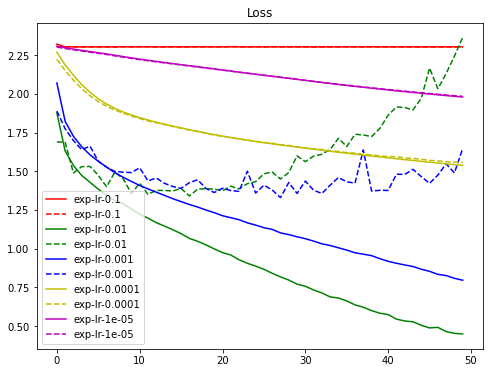

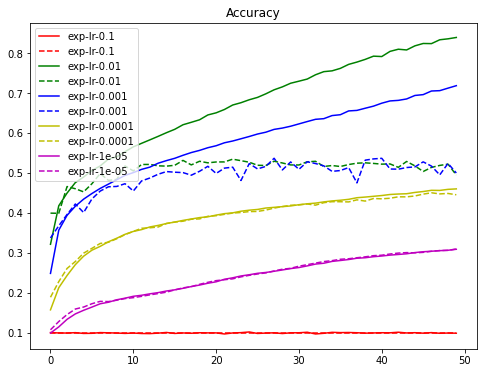

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()